# **Face Mask Detection**

In [2]:
# importing necessary libraries

import tensorflow as tf
import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications import MobileNet
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalMaxPool2D
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.models import load_model
from tensorflow.keras.metrics import Precision, Recall
from mtcnn.mtcnn import MTCNN

In [2]:
# Checking for gpus

gpus = tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus: 
    tf.config.experimental.set_memory_growth(gpu, True)

print(gpus)

[]


In [3]:
# creating datagen object
# this object will perform image segmentations

train_datagen = ImageDataGenerator( rotation_range=20,        
                                    width_shift_range=0.2,    
                                    height_shift_range=0.2,   
                                    shear_range=0.2,          
                                    zoom_range=0.2,           
                                    horizontal_flip=True,     
                                    brightness_range=[0.8, 1.2],     
                                    fill_mode='nearest',
                                    rescale = 1./255,)

val_datagen = ImageDataGenerator(
                                 rescale = 1./255
                                 )


In [4]:
# creating pipelines for train, test and validation datasets

train_data = train_datagen.flow_from_directory(
                        'Dataset/train',
                        target_size = (128, 128),
                        batch_size = 32,
                        class_mode = 'binary'
)

val_data = val_datagen.flow_from_directory(
                       'Dataset/validation',
                       target_size = (128, 128),
                       batch_size = 32,
                       class_mode = 'binary'
)


Found 8832 images belonging to 2 classes.
Found 1279 images belonging to 2 classes.


In [12]:
# length of training data

print(len(train_data))

237


In [14]:
# creating base model 

base_model = MobileNet(weights='imagenet', include_top=False, classifier_activation='sigmoid', 
                            classes=2, input_shape=(128, 128, 3))

In [15]:
# model architecture

base_model.trainable = True

model = Sequential()
model.add(base_model)
model.add(GlobalMaxPool2D())
model.add(Dense(1, activation='sigmoid'))

In [16]:
# model summary

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenet_1.00_128 (Functi  (None, 4, 4, 1024)        3228864   
 onal)                                                           
                                                                 
 global_max_pooling2d (Glob  (None, 1024)              0         
 alMaxPooling2D)                                                 
                                                                 
 dense (Dense)               (None, 1)                 1025      
                                                                 
Total params: 3229889 (12.32 MB)
Trainable params: 3208001 (12.24 MB)
Non-trainable params: 21888 (85.50 KB)
_________________________________________________________________


In [17]:
# compiling model

model.compile(optimizer=Adam(), loss='binary_crossentropy', metrics=['accuracy', Precision(), Recall()])

In [18]:
# training model

hist = model.fit(train_data, epochs=10, validation_data=val_data)

Epoch 1/10


2024-09-10 16:19:03.954259: I external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:454] Loaded cuDNN version 8907
2024-09-10 16:19:04.195602: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-10 16:19:04.407438: I external/local_tsl/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2024-09-10 16:19:08.113885: I external/local_xla/xla/service/service.cc:168] XLA service 0x7f20201c8e90 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2024-09-10 16:19:08.113960: I external/local_xla/xla/service/service.cc:176]   StreamExecutor device (0): NVIDIA GeForce RTX 3050 Ti Laptop GPU, Compute Capability 8.6
2024-09-10 16:19:08.146163: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:269] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
I0000 00:00:1725965348.319706   32690 de

  6/237 [..............................] - ETA: 34s - loss: 0.7853 - accuracy: 0.8438 - precision: 0.8537 - recall: 0.7955    

/home/yash/anaconda3/envs/py10/lib/python3.10/site-packages/PIL/Image.py:1056: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


237/237 [==============================] - 77s 235ms/step - loss: 0.2752 - accuracy: 0.9624 - precision: 0.9668 - recall: 0.9587 - val_loss: 1.5251 - val_accuracy: 0.7858 - val_precision: 1.0000 - val_recall: 0.5685
Epoch 2/10
237/237 [==============================] - 48s 204ms/step - loss: 0.1132 - accuracy: 0.9763 - precision: 0.9767 - recall: 0.9765 - val_loss: 0.1309 - val_accuracy: 0.9844 - val_precision: 1.0000 - val_recall: 0.9685
Epoch 3/10
237/237 [==============================] - 47s 198ms/step - loss: 0.0517 - accuracy: 0.9846 - precision: 0.9871 - recall: 0.9825 - val_loss: 0.0075 - val_accuracy: 0.9984 - val_precision: 1.0000 - val_recall: 0.9969
Epoch 4/10
237/237 [==============================] - 47s 198ms/step - loss: 0.0347 - accuracy: 0.9895 - precision: 0.9903 - recall: 0.9890 - val_loss: 0.0099 - val_accuracy: 0.9969 - val_precision: 1.0000 - val_recall: 0.9937
Epoch 5/10
237/237 [==============================] - 47s 198ms/step - loss: 0.0319 - accuracy: 0.9902 

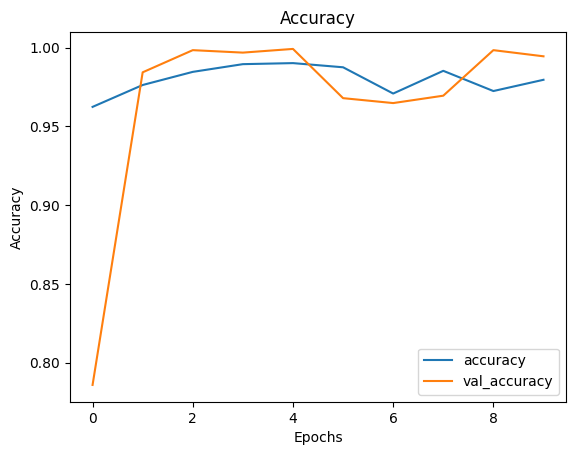

In [21]:
# plotting accuracy

plt.plot(hist.history['accuracy'], label='accuracy')
plt.plot(hist.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title("Accuracy")
plt.legend()
plt.show()

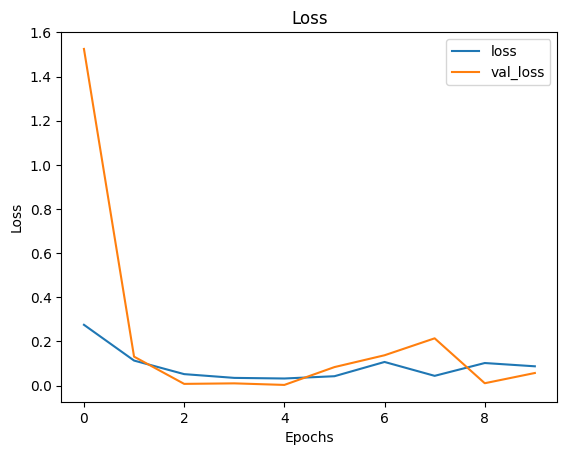

In [24]:
# plotting loss

plt.plot(hist.history['loss'], label='loss')
plt.plot(hist.history['val_loss'], label='val_loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title("Loss")
plt.legend()
plt.show()

In [6]:
model = load_model('face_mask_detection.h5')

In [7]:
def detect_face_mask(frame):
    # pred = model.predict(img.reshape(1, 128, 128, 3))
    # return pred[0][0]
    resized_frame = cv2.resize(frame, (128, 128))
    
    resized_frame = resized_frame / 255.0  
    
    # Expand dimensions for batch size
    resized_frame = np.expand_dims(resized_frame, axis=0)
    
    # Predict mask or no mask
    return model.predict(resized_frame)[0][0]



In [8]:
sample = cv2.imread('Dataset/samples/without_mask_3.webp')

In [9]:
pred = detect_face_mask(sample)
print(pred)
if pred>=0.4:
    print('Without Mask')
else:
    print('With Mask')    

1/1 [==============================] - 1s 965ms/step
0.010109809
With Mask


In [10]:
# model.save('face_mask_detection.h5')

In [15]:
detector = MTCNN()

def detect_face_mask(frame):
    faces = detector.detect_faces(frame)
    
    # Check if any faces are detected
    if faces:
        for face in faces:
            x, y, width, height = face['box']
            
            # Extract face region
            face_region = frame[y:y+height, x:x+width]
            
            # Resize for mask detection model
            face_region = cv2.resize(face_region, (128, 128))
            face_region = face_region / 255.0  # Normalize if needed
            
            # Pass face region to mask detection model
            y_pred = model.predict(np.expand_dims(face_region, axis=0))
            
            # Draw the prediction on the frame
            if y_pred >= 0.4:
                label = "Without Mask"
                color = (0, 0, 255)  # Red for no mask
            else:
                label = "With Mask"
                color = (0, 255, 0)  # Green for mask
            
            cv2.rectangle(frame, (x, y), (x + width, y + height), color, 2)
            cv2.putText(frame, label, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, color, 2)
    
    return frame

In [16]:
cap = cv2.VideoCapture(0)

In [17]:
# face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

In [18]:
while True:
    ret, frame = cap.read()
    
    if not ret:
        break

    # Perform face and mask detection
    frame = detect_face_mask(frame)

    # Display the result
    cv2.imshow('Face Mask Detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

cap.release()
cv2.destroyAllWindows()

1/1 [==============================] - 0s 39ms/step
